# VERSION ANTERIOR (CRISTIAN)

In [1]:
#importo librerias
import pandas as pd #Manejo de dataframes
import numpy as np #Creacion de arrays y manejo de estadisticas
import missingno as msno #Utilizada en la visualizacion de valores nulos
import re #utilizada en la parte de limpieza de caracteres extranos
import scipy.stats as st #Utilizacion para optencion de estadisticas
import matplotlib.pyplot as plt


In [2]:
#Data frames de denuncias

#Denuncias
df_denuncias = pd.read_csv('oficina-rescate-denuncias-202001-202307.csv', index_col=None)
#denuncias referidos
df_denuncias_dos = pd.read_csv('oficina-rescate-denuncias-referidos-202001-202307.csv', index_col=None)

#orientaciones
df_orientaciones = pd.read_csv('oficina-rescate-orientaciones-202001-202307.csv')
#orientaciones referidos
df_orientaciones_dos = pd.read_csv('oficina-rescate-orientaciones-referidos-202001-202307.csv')

In [3]:
df_denuncias_dos.head()


,nro_registro_interno,fecha_ingreso_denuncia,tema,subtema,referido_tipo,nacionalidad,provincia,localidad,genero,edad_aparente,embarazada,discapacidad,provincia_indec_id
0,2584554505,2020-01-01,Trata,"Explotación sexual niñas, niños y adolescentes",Victima directa,Argentina,Buenos Aires,Buenos Aires,Mujer,14.0,No,NaN,6.0
1,2584554505,2020-01-01,Trata,"Explotación sexual niñas, niños y adolescentes",Acusado,Argentina,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Mujer,36.0,No,NaN,2.0
2,2594554505,2020-01-02,Trata,Persona desaparecida,Victima directa,Paraguay,Buenos Aires,NaN,Mujer,NaN,No,NaN,6.0
3,3584554505,2020-01-02,Trata,"Extracción forzosa de órganos, tejidos o fluidos",Acusado,Argentina,Buenos Aires,San Francisco Solano,Hombre,60.0,No,NaN,6.0
4,594554505,2020-01-02,Trata,Explotación sexual,Acusado,Argentina,Córdoba,Laboulaye,Hombre,NaN,No,NaN,14.0


# ULTIMA VERSION (IAN)

# ( 1 ) CODIGO GENERAL

##( 1.1 ) LIBRERIAS

In [1]:
#importo librerias
import pandas as pd #Manejo de dataframes
import numpy as np #Creacion de arrays y manejo de estadisticas
import missingno as msno #Utilizada en la visualizacion de valores nulos
import re #utilizada en la parte de limpieza de caracteres extranos
import scipy.stats as st #Utilizacion para optencion de estadisticas
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', 30)

##( 1.2 ) VALORES NULOS TIPICOS

1.   Elemento de lista
2.   Elemento de lista



In [5]:
# Listas de valores nulos comunes
common_na_strings = ["faltante", "NA", "N A", "N/A", "#N/A", "NA ", " NA", "N /A", "N / A", " N / A",
                    "N / A ", "na", "n a", "n/a", "na "," na", "n /a", "n / a", " a / a", "n / a ",
                    "NULO", "nulo", "", "?", "*", "."]

common_na_numeros = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

In [24]:
#def porcentaje_nulos(conjunto):
#    total_nulos = conjunto.values.sum()
#    diccionario_porcentajes_nulos = {}
#    for col in conjunto.index:
#        porcentaje = str(round((conjunto[col] / total_nulos * 100), 2)) + '%'
#        diccionario_porcentajes_nulos[col] = porcentaje
#
#   return diccionario_porcentajes_nulos

In [65]:
def porcentaje_nulos(conjunto):
    total_datos = 5912
    total_nulos = conjunto.isnull().sum()
    diccionario_porcentajes_nulos = {}
    for col in total_nulos.index:
        porcentaje = (round((total_nulos[col] / total_datos * 100), 2)) # + '%'
        diccionario_porcentajes_nulos[col] = porcentaje
    return diccionario_porcentajes_nulos

In [66]:
print(porcentaje_nulos(df_denuncias))

{'fecha_ingreso': 0.0, 'hora_ingreso': 53.59, 'nro_registro_interno': 0.0, 'situacion': 0.34, 'origen': 0.0, 'es_anonima': 0.0, 'tema': 0.0, 'subtema': 0.0, 'provincia': 7.97, 'localidad': 14.77, 'dependencia_alta': 0.0, 'via_ingreso': 0.02, 'derivacion_institucion': 6.92, 'derivacion_fecha': 6.92, 'derivacion_judicializa': 6.92, 'derivacion2_institucion': 80.41, 'derivacion2_fecha': 80.41, 'derivacion2_judicializa': 80.41, 'derivacion3_institucion': 99.66, 'derivacion3_fecha': 99.66, 'derivacion3_judicializa': 99.66, 'denunciante_nacionalidad': 81.82, 'denunciante_provincia': 48.83, 'denunciante_localidad': 86.89, 'denunciante_tipo': 5.67, 'denunciante_como_conocio_la_linea': 82.48, 'denunciante_genero': 17.51, 'denunciante_edad_aparente': 21.87, 'provincia_indec_id': 10.64}


#( 2 ) CSV DENUNCIAS

##( 2.1 ) CARGA

In [ ]:
#Data frames de denuncias
#Denuncias
df_denuncias = pd.read_csv('../datos/csv brutos/oficina-rescate-denuncias-202001-202307.csv', index_col=None)

In [7]:
df_denuncias.shape # Total de registros, Total de columnas del dataset

(5912, 29)

In [8]:
df_denuncias.sample(2, random_state = 4)

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,dependencia_alta,via_ingreso,derivacion_institucion,derivacion_fecha,derivacion_judicializa,derivacion2_institucion,derivacion2_fecha,derivacion2_judicializa,derivacion3_institucion,derivacion3_fecha,derivacion3_judicializa,denunciante_nacionalidad,denunciante_provincia,denunciante_localidad,denunciante_tipo,denunciante_como_conocio_la_linea,denunciante_genero,denunciante_edad_aparente,provincia_indec_id
478,2020-04-17,NaN,505455505,Urgencia,Ciudadano,No,Trata,Grooming,Buenos Aires,Florencio Varela,PNR - Línea 145,Línea 145,Protex,2020-04-17 18:45,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
5620,2023-05-31,14:28,2545751535,Emergencia,Ciudadano,Sí,Trata,"Explotación sexual niñas, niños y adolescentes",Santa Fe,Rosario,PNR - Línea 145,Línea 145,911,2023-05-31 15:26,Sí,Protex,2023-05-31 15:26,No,NaN,NaN,NaN,NaN,Santa Fe,NaN,Denunciante - ciudadano,NaN,Mujer,0.0,82.0


##( 2.2 ) CARACTERES EXTRANOS

In [9]:
df_denuncias.sample(3, random_state = 3)

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,dependencia_alta,via_ingreso,derivacion_institucion,derivacion_fecha,derivacion_judicializa,derivacion2_institucion,derivacion2_fecha,derivacion2_judicializa,derivacion3_institucion,derivacion3_fecha,derivacion3_judicializa,denunciante_nacionalidad,denunciante_provincia,denunciante_localidad,denunciante_tipo,denunciante_como_conocio_la_linea,denunciante_genero,denunciante_edad_aparente,provincia_indec_id
2459,2021-08-06,NaN,7594845515,Urgencia,Ciudadano,Sí,Trata,"Explotación sexual niñas, niños y adolescentes",Buenos Aires,Trenque Lauquen,PNR - Línea 145,Línea 145,Protex,2021-08-06 22:39,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denunciante - ciudadano,NaN,Hombre,50.0,6.0
1507,2021-01-13,NaN,4555359415,Urgencia,Ciudadano,No,Trata,Persona desaparecida,Buenos Aires,La Plata,PNR - Línea 145,Correo Institucional,Protex,2021-01-13 11:46,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buenos Aires,La Plata,Denunciante - ciudadano,NaN,Mujer,35.0,6.0
924,2020-08-14,NaN,3565356505,Urgencia,Ciudadano,Sí,Trata,Explotación sexual,Buenos Aires,La Plata,PNR - Línea 145,Línea 145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denunciante - ciudadano,Derivado de otro organismo,NaN,26.0,6.0


In [ ]:
#Sin simbolos extranos

##( 2.3 ) NULOS

In [10]:
#valores nulos por columnas (ANTES)
df_denuncias.isnull().sum()

fecha_ingreso                           0
hora_ingreso                         3168
nro_registro_interno                    0
situacion                              20
origen                                  0
es_anonima                              0
tema                                    0
subtema                                 0
provincia                             471
localidad                             873
dependencia_alta                        0
via_ingreso                             1
derivacion_institucion                409
derivacion_fecha                      409
derivacion_judicializa                409
derivacion2_institucion              4754
derivacion2_fecha                    4754
derivacion2_judicializa              4754
derivacion3_institucion              5892
derivacion3_fecha                    5892
derivacion3_judicializa              5892
denunciante_nacionalidad             4837
denunciante_provincia                2887
denunciante_localidad             

In [11]:
df_denuncias = df_denuncias.replace(
    to_replace = common_na_strings,
    value = np.nan
).replace(
    to_replace = common_na_numeros,
    value = np.nan
)

In [12]:
#valores nulos por columnas (DESPUES)
df_denuncias.isnull().sum()

fecha_ingreso                           0
hora_ingreso                         3168
nro_registro_interno                    0
situacion                              20
origen                                  0
es_anonima                              0
tema                                    0
subtema                                 0
provincia                             471
localidad                             873
dependencia_alta                        0
via_ingreso                             1
derivacion_institucion                409
derivacion_fecha                      409
derivacion_judicializa                409
derivacion2_institucion              4754
derivacion2_fecha                    4754
derivacion2_judicializa              4754
derivacion3_institucion              5892
derivacion3_fecha                    5892
derivacion3_judicializa              5892
denunciante_nacionalidad             4837
denunciante_provincia                2887
denunciante_localidad             

<Axes: >

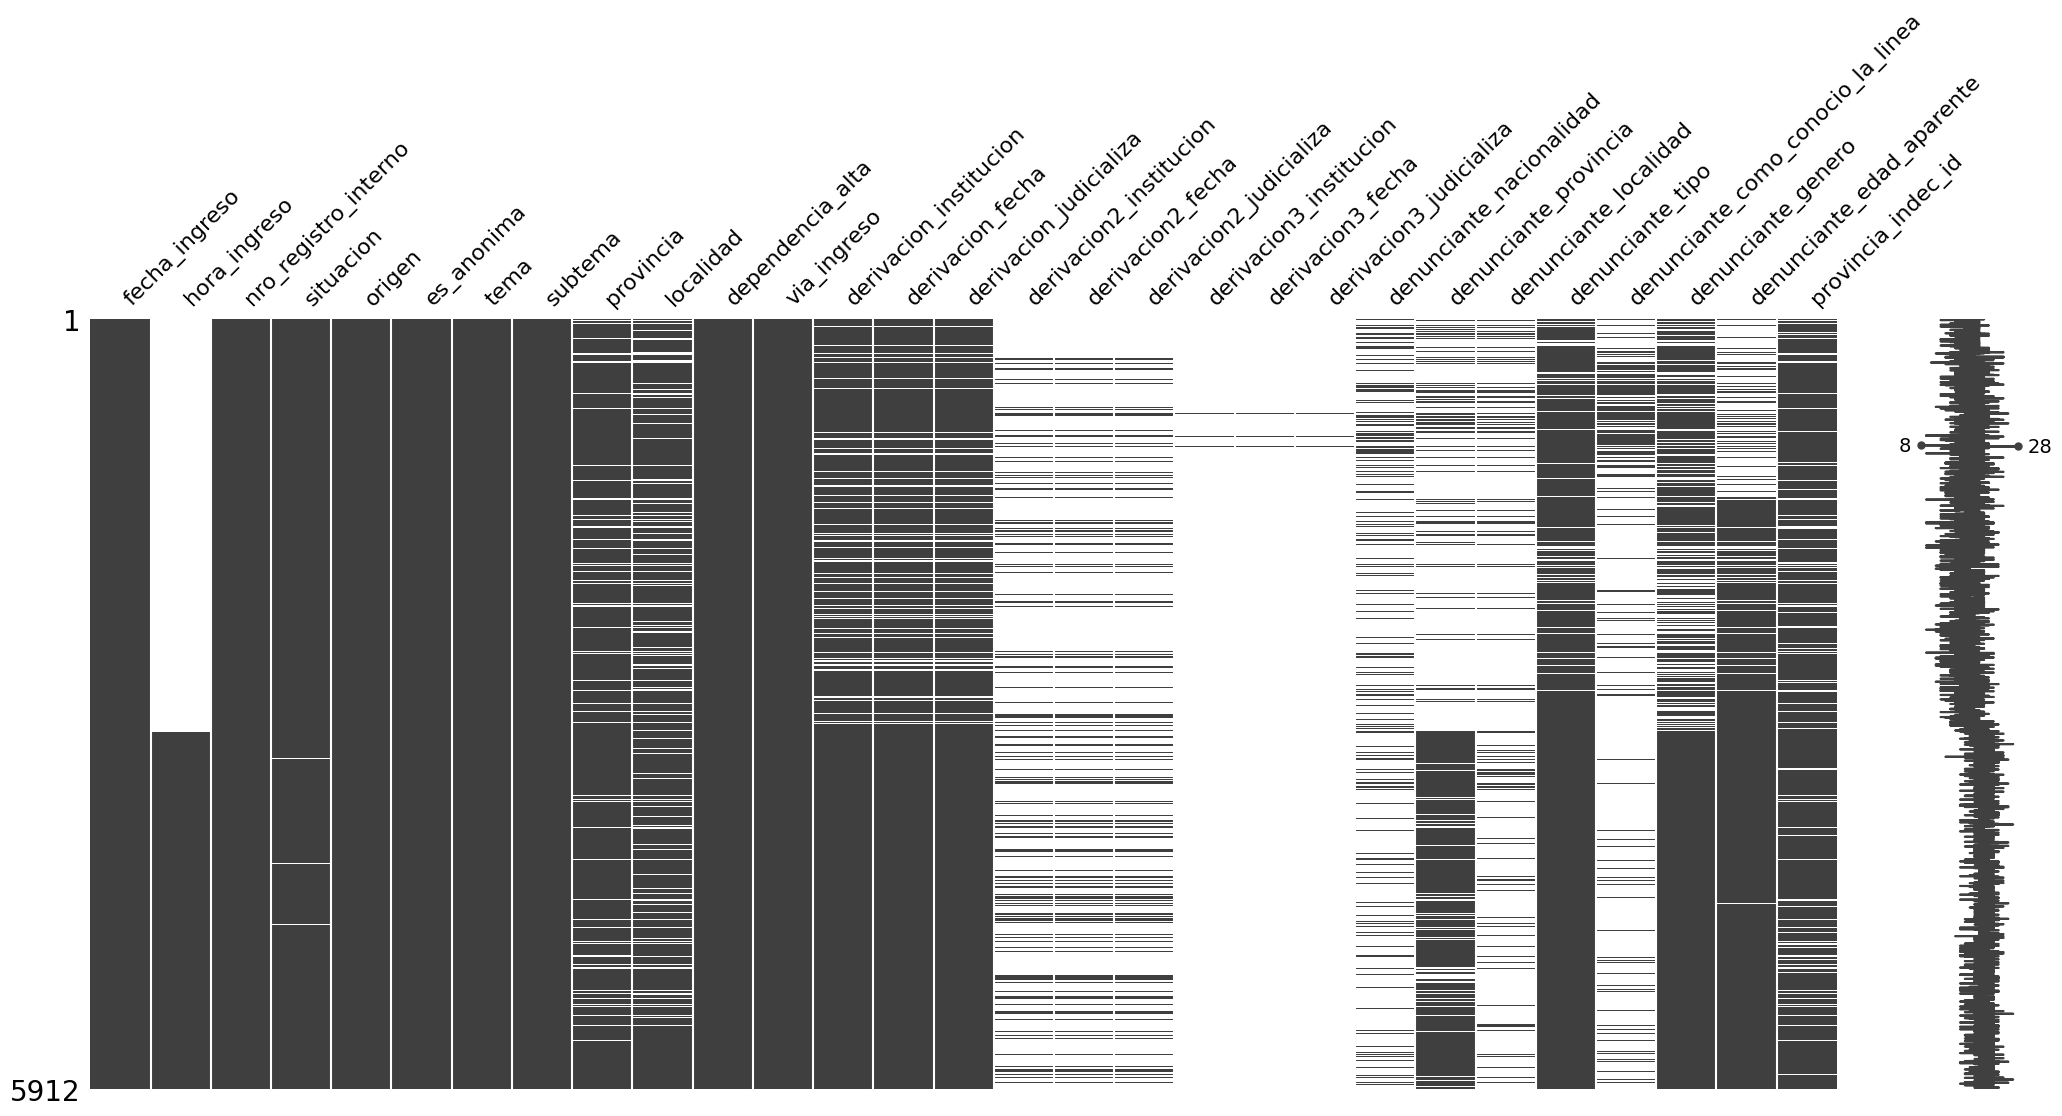

In [13]:
msno.matrix(df_denuncias) # MUY BUEN LIBRERIA, NO LA CONOCIA *** BORRAR ***

In [72]:
diccionario_nulos = porcentaje_nulos(df_denuncias)
print(diccionario_nulos)

{'fecha_ingreso': 0.0, 'hora_ingreso': 53.59, 'nro_registro_interno': 0.0, 'situacion': 0.34, 'origen': 0.0, 'es_anonima': 0.0, 'tema': 0.0, 'subtema': 0.0, 'provincia': 7.97, 'localidad': 14.77, 'dependencia_alta': 0.0, 'via_ingreso': 0.02, 'derivacion_institucion': 6.92, 'derivacion_fecha': 6.92, 'derivacion_judicializa': 6.92, 'derivacion2_institucion': 80.41, 'derivacion2_fecha': 80.41, 'derivacion2_judicializa': 80.41, 'derivacion3_institucion': 99.66, 'derivacion3_fecha': 99.66, 'derivacion3_judicializa': 99.66, 'denunciante_nacionalidad': 81.82, 'denunciante_provincia': 48.83, 'denunciante_localidad': 86.89, 'denunciante_tipo': 5.67, 'denunciante_como_conocio_la_linea': 82.48, 'denunciante_genero': 17.51, 'denunciante_edad_aparente': 21.87, 'provincia_indec_id': 10.64}


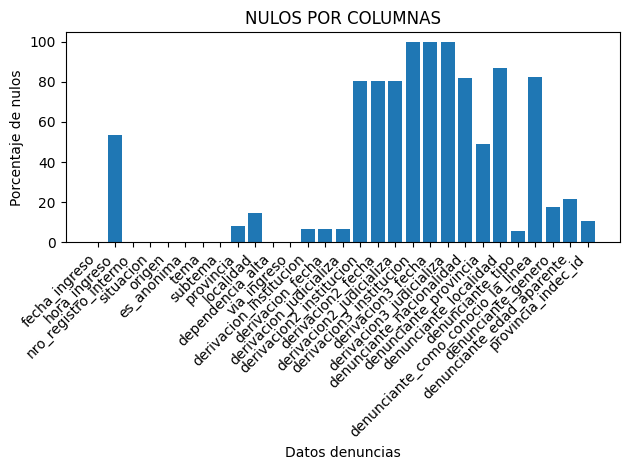

In [71]:

plt.bar(diccionario_nulos.keys(), diccionario_nulos.values())
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Datos denuncias')
plt.ylabel('Porcentaje de nulos')
plt.title('NULOS POR COLUMNAS')
plt.tight_layout()  # Ajustar el diseño
plt.show()

##( 2.4 ) ELIMINACION COLUMNAS

Ian, estoy de acuerdo en eliminar las columnas de derivacion 2 y 3, provincia_indec. Y tambien las de nacionalidad y localidad del denunciante por la gran cantidad de nulos, pero dejaria tipo, genero y edad aparente, que tienen menor % de nulos porque creo que la informacion del denunciante es vital en el dataset para las etapas de analisis y visualizacion. Sacaria tambien la horade ingreso.

In [16]:
# Renombrar y eliminar columnas en df_denuncias
df_denuncias2 = df_denuncias.drop([
    'hora_ingreso',
    'provincia_indec_id',
    'derivacion2_institucion',
    'derivacion2_fecha',
    'derivacion2_judicializa',
    'derivacion3_institucion',
    'derivacion3_fecha',
    'derivacion3_judicializa',
    'denunciante_nacionalidad',
    'denunciante_localidad',], axis=1)
#    'denunciante_tipo',
#    'denunciante_genero',
#    'denunciante_edad_aparente'], axis=1)

In [18]:
df_denuncias2.shape

(5912, 20)

## ( 2.5 ) GUARDADO CSV LIMPIO

In [ ]:
df_denuncias.to_csv('../datos/csv procesados/limpios_denuncias.csv', index=False)

##( 2.6 ) OBSERVACIONES

`Ian, las conclusiones habria que revisarlas ya que los porcentajes de los nulos son mayores.`

denunciante_como_conocio_la_linea: Esta columna presenta un alto porcentaje de valores faltantes, alcanzando el 22.87% de los registros. Es importante considerar estrategias para abordar estos faltantes y comprender su posible impacto en los resultados.

denunciante_localidad: Alrededor del 24.09% de los registros no cuentan con valores en la columna de localidad del denunciante. Esto podría influir en el análisis, por lo que es crucial evaluar cómo manejar estos valores faltantes.

denunciante_edad_aparente: La columna de edad aparente del denunciante presenta un 6.06% de valores faltantes. Estos faltantes pueden tener implicaciones en la segmentación y el análisis por grupos de edad.

localidad: La columna de localidad muestra un 4.09% de valores faltantes. Es importante evaluar si estos valores faltantes afectan el análisis y considerar cómo completarlos.

provincia: La columna de provincia tiene un 13.54% de valores faltantes. Esto puede afectar la integridad de los, en la etapa de eda debe considerar que hacer con estos datos antes de guardar la copia final.

# CSV ORIENTACIONES


### LECTURA

In [ ]:
#dataframes de orientaciones
df_orientaciones = pd.read_csv('../datos/csv brutos/oficina-rescate-orientaciones-202001-202307.csv')

In [ ]:
df_orientaciones.sample(3, random_state = 3)

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,dependencia_alta,via_ingreso,consultante_nacionalidad,consultante_provincia,consultante_localidad,consultante_tipo,consultante_como_conocio_la_linea,consultante_genero,consultante_edad_aparente,provincia_indec_id
4372,2023-01-18,22:17,575258435,Urgencia,Ciudadano,Sí,Violencias,Familiar > asesoramiento para realizar denuncia,Corrientes,Santo Tome,PNR - Línea 145,Línea 145,NaN,Corrientes,NaN,Consultante,NaN,Hombre,30.0,18
93,2020-02-04,NaN,555754505,Urgencia,Ciudadano,Si,Trata,"Pornografía infantil, perverso",Córdoba,Córdoba,PNR - Línea 145,Línea 145,NaN,Córdoba,Córdoba,Consultante,NaN,Hombre,NaN,14
3129,2022-02-15,15:04,6535050525,Urgencia,Ciudadano,No,Trata,Salud mental,Ciudad Autónoma de Buenos Aires,Buenos Aires,PNR - Línea 145,Línea 145,NaN,Ciudad Autónoma de Buenos Aires,NaN,Consultante,NaN,Mujer cis,0.0,02


### COLUMNAS

In [ ]:
# Renombrar y eliminar columnas en df_denuncias
df_orientaciones = df_orientaciones.drop(['provincia_indec_id', 'dependencia_alta', 'consultante_nacionalidad', 'consultante_tipo', 'consultante_localidad', 'consultante_genero'], axis=1)

In [ ]:
df_orientaciones.sample(3, random_state = 3)

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,via_ingreso,consultante_provincia,consultante_como_conocio_la_linea,consultante_edad_aparente
4372,2023-01-18,22:17,575258435,Urgencia,Ciudadano,Sí,Violencias,Familiar > asesoramiento para realizar denuncia,Corrientes,Santo Tome,Línea 145,Corrientes,NaN,30.0
93,2020-02-04,NaN,555754505,Urgencia,Ciudadano,Si,Trata,"Pornografía infantil, perverso",Córdoba,Córdoba,Línea 145,Córdoba,NaN,NaN
3129,2022-02-15,15:04,6535050525,Urgencia,Ciudadano,No,Trata,Salud mental,Ciudad Autónoma de Buenos Aires,Buenos Aires,Línea 145,Ciudad Autónoma de Buenos Aires,NaN,0.0


### VALORES

### CARACTERES EXTRANOS

In [ ]:
#Sin simbolos extranos

### NULOS

In [ ]:
df_orientaciones = df_orientaciones.replace(
    to_replace = common_na_strings,
    value = np.nan
).replace(
    to_replace = common_na_numeros,
    value = np.nan
)

<AxesSubplot:>

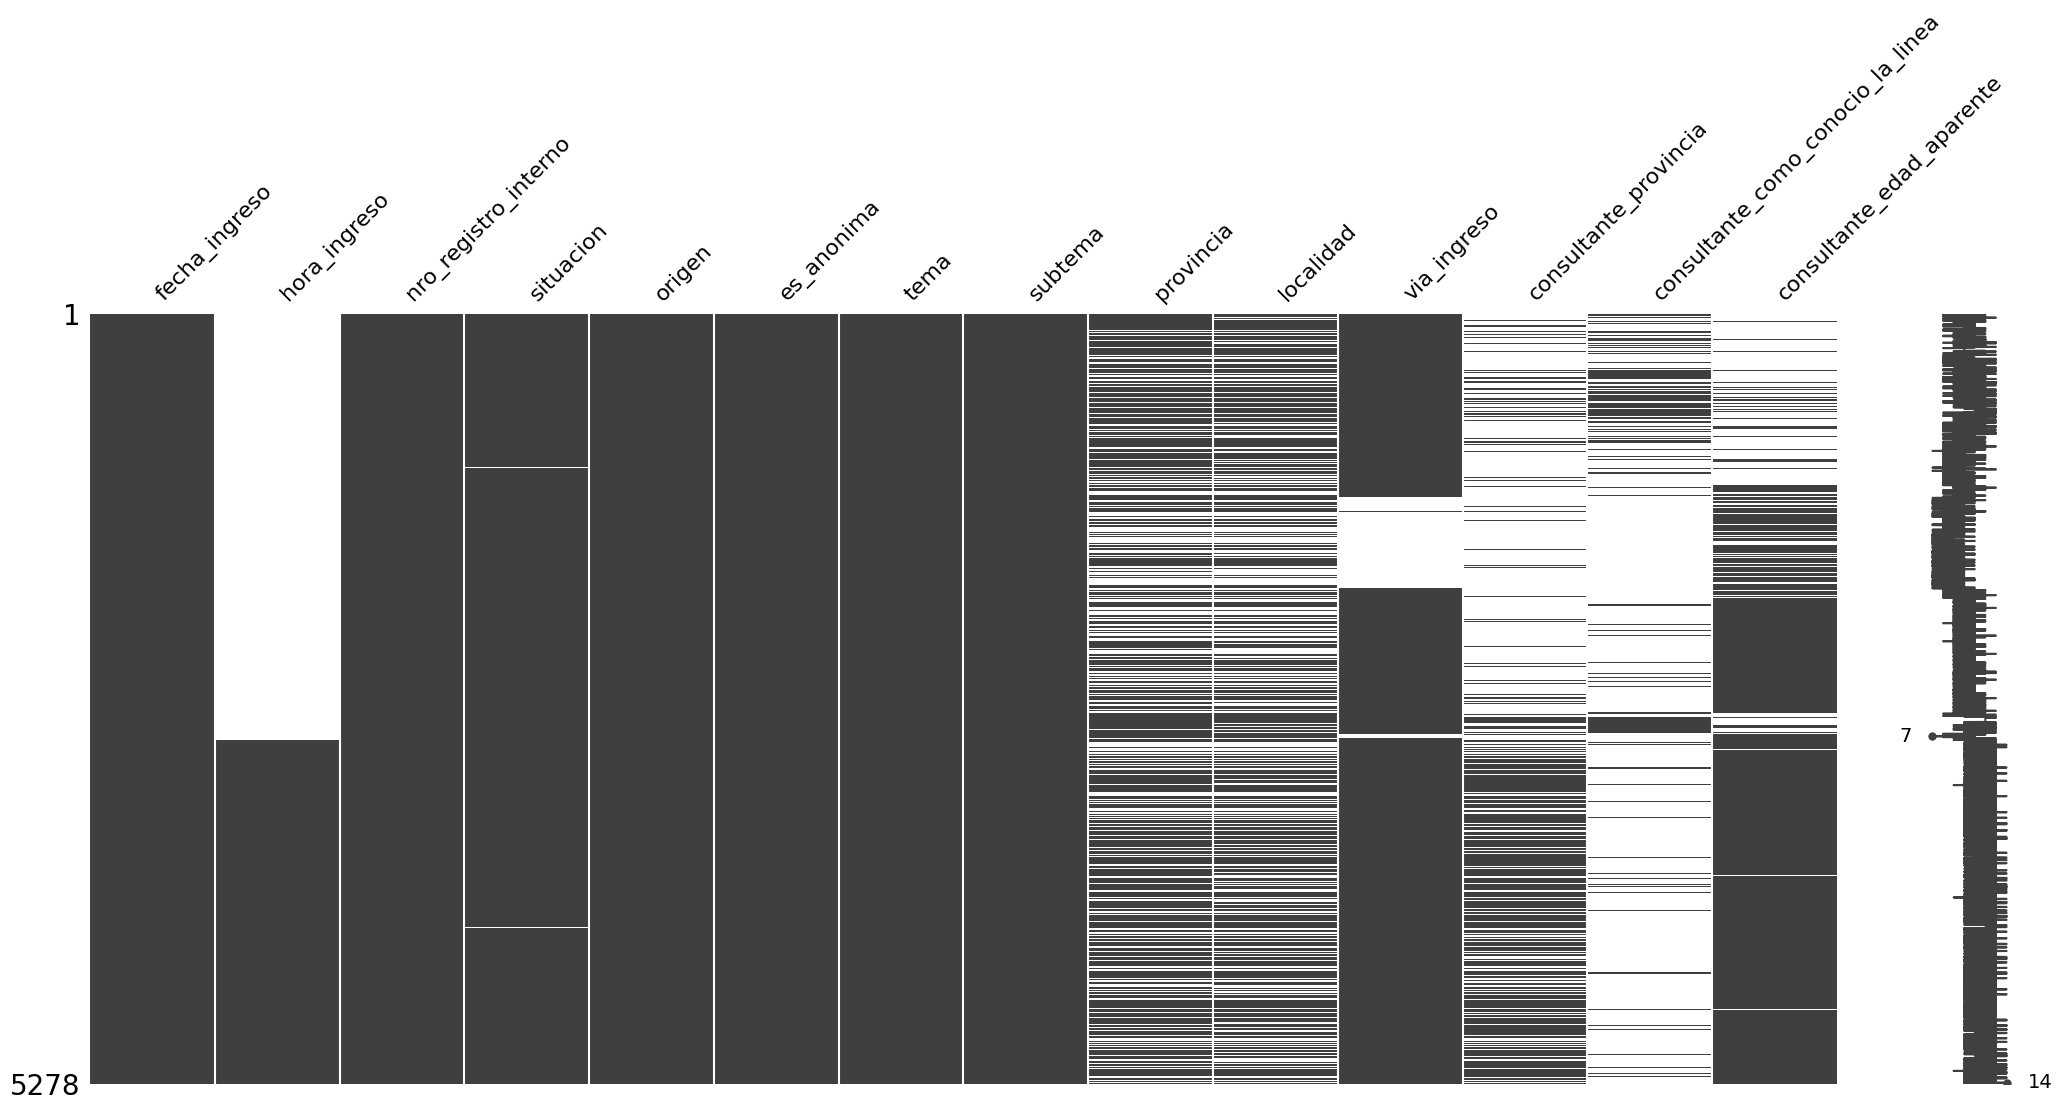

In [ ]:
msno.matrix(df_orientaciones)

In [ ]:
#valores nulos por columnas
df_orientaciones.isnull().sum()

fecha_ingreso                           0
hora_ingreso                         2920
nro_registro_interno                    0
situacion                              10
origen                                  0
es_anonima                              0
tema                                    5
subtema                                 5
provincia                            1928
localidad                            2176
via_ingreso                           639
consultante_provincia                3080
consultante_como_conocio_la_linea    4449
consultante_edad_aparente            1306
dtype: int64

In [ ]:
diccionario_nulos = porcentaje_nulos(df_orientaciones.isnull().sum())


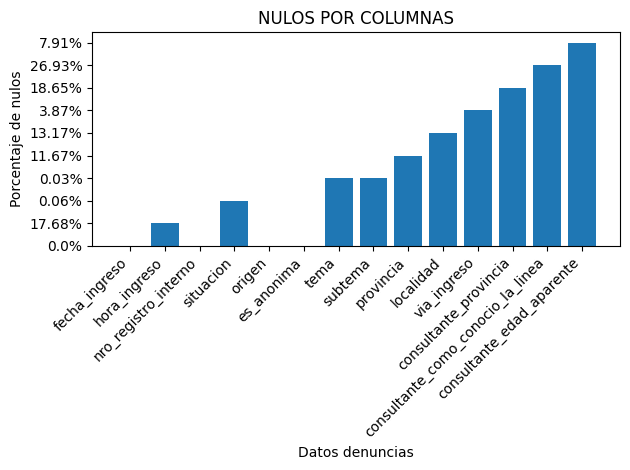

In [ ]:
plt.bar(diccionario_nulos.keys(), diccionario_nulos.values())
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Datos denuncias')
plt.ylabel('Porcentaje de nulos')
plt.title('NULOS POR COLUMNAS')
plt.tight_layout()  # Ajustar el diseño
plt.show()

### GUARDADO CSV LIMPIO

In [ ]:
df_orientaciones.to_csv('../datos/csv procesados/limpios_orientaciones.csv', index=False)

### OBSERVACIONES:

consultante_como_conocio_la_linea: Este campo tiene un alto porcentaje de valores faltantes, alcanzando el 33.11% de los registros.

localidad: La columna de localidad tiene un valor faltante en el 16.19% de los casos, lo que sugiere que puede ser importante considerar una estrategia para completar estos valores.

provincia: La columna de provincia muestra un valor faltante en aproximadamente el 14.35% de los registros. Puede ser relevante evaluar cómo manejar estos faltantes.

consultante_edad_aparente: Cerca del 9.72% de los registros no cuentan con el valor de la edad aparente del consultante.

hora_ingreso: La columna de hora_ingreso tiene valores faltantes en alrededor del 21.73% de los registros.